# Use a CNN to recognize sounds

This notebook contains all the code you need to use an existing (pre-trained) OpenSoundscape convolutional neural network model (CNN) to make predictions on your own data - for instance, to detect the song or call of an animal the CNN has been trained to recognize. It asssumes that you already have access to a CNN that has been trained to recognize the sound of interest. 

To find publicly available pre-trained CNNs, check out the [Bioacoustics Model Zoo](https://github.com/kitzeslab/bioacoustics-model-zoo/tree/main). 

If you are interested in training your own CNN, see the other tutorials at [opensoundscape.org](https://opensoundscape.org) related to model training. 

Before running this tutorial, install OpenSoundscape by following the instructions on the OpenSoundscape website, [opensoundscape.org](http://opensoundscape.org/). More detailed tutorials about data preprocessing, training CNNs, and customizing prediction methods can also be found on this site.


## Run this tutorial

This tutorial is more than a reference! It's a Jupyter Notebook which you can run and modify on Google Colab or your own computer.

|Link to tutorial|How to run tutorial|
| :- | :- |
| [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kitzeslab/opensoundscape/blob/master/docs/tutorials/predict_with_cnn.ipynb) | The link opens the tutorial in Google Colab. Uncomment the "installation" line in the first cell to install OpenSoundscape. |
| [![Download via DownGit](https://img.shields.io/badge/GitHub-Download-teal?logo=github)](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/kitzeslab/opensoundscape/blob/master/docs/tutorials/predict_with_cnn.ipynb) | The link downloads the tutorial file to your computer. Follow the [Jupyter installation instructions](https://opensoundscape.org/en/latest/installation/jupyter.html), then open the tutorial file in Jupyter. |

In [1]:
# if this is a Google Colab notebook, install opensoundscape in the runtime environment
if 'google.colab' in str(get_ipython()):
  %pip install opensoundscape

### package imports

The `cnn` module provides a function `load_model` to load saved opensoundscape models

In [2]:
from opensoundscape.ml.cnn import load_model
from opensoundscape import Audio
import opensoundscape

/Users/SML161/opensoundscape/opensoundscape/ml/cnn.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


load some additional packages and perform some setup for the Jupyter notebook.

In [3]:
# Other utilities and packages
import torch
from pathlib import Path
import numpy as np
import pandas as pd
from glob import glob
import subprocess

In [4]:
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'

### Load a model

Models can be loaded either from a local file (`load_model(file_path)`) or directly from the [Bioacoustics Model Zoo](https://github.com/kitzeslab/bioacoustics-model-zoo/tree/main) like this:

In [5]:
import torch

# list available models from the model zoo
torch.hub.list('kitzeslab/bioacoustics-model-zoo')

Using cache found in /Users/SML161/.cache/torch/hub/kitzeslab_bioacoustics-model-zoo_main


['BirdNET', 'Perch', 'SeparationModel', 'YAMNet', 'rana_sierrae_cnn']

In [6]:
# load a model that recognizes the calls of Rana sierrae (Sierra Nevada yellow-legged frog)
model = torch.hub.load('kitzeslab/bioacoustics-model-zoo','rana_sierrae_cnn')

Using cache found in /Users/SML161/.cache/torch/hub/kitzeslab_bioacoustics-model-zoo_main


#### Save model to file
If you wish to save the model to a local file, simply use `.save()`:

In [7]:
model.save('rana_sierrae_cnn.model')

#### Load a CNN from a local file
loading a CNN from a local file using the `opensoundscape.cnn.load_model` function:

In [8]:
model = load_model('./rana_sierrae_cnn.model')

### Choose audio files for prediction

Create a list of audio files to predict on. They can be of any length. Consider using `glob` to find many files at once.

For this example, let's download a 1-minute audio clip:

In [9]:
url = 'https://tinyurl.com/birds60s'
Audio.from_url(url).save('./1min.wav')

use glob to create a list of all files matching a pattern in a folder:

In [10]:
from glob import glob 
audio_files = glob('./*.wav') #match all .wav files in the current directory
audio_files

['./1min.wav']

## generate predictions with the model
The model returns a dataframe with a MultiIndex of file, start_time, and end_time. There is one column for each class. 

The values returned by the model range from -infinity to infinity (theoretically), and higher scores mean the model is more confident the class (song/species/sound type) is present in the audio clip.

In [11]:
scores = model.predict(audio_files)
scores.head()

  0%|          | 0/30 [00:00<?, ?it/s]

rana_sierrae  negative
file       start_time end_time                        
./1min.wav 0.0        2.0           0.572299 -1.430894
           2.0        4.0          -0.639675  0.069458
           4.0        6.0          -1.777434  0.711552
           6.0        8.0          -1.435256  0.509185
           8.0        10.0         -2.444183  1.802426

## Overlapping prediction clips

In [12]:
scores = model.predict(audio_files, overlap_fraction=0.5)
scores.head()

  0%|          | 0/59 [00:00<?, ?it/s]

rana_sierrae  negative
file       start_time end_time                        
./1min.wav 0.0        2.0           0.572299 -1.430894
           1.0        3.0           0.012056 -0.801372
           2.0        4.0          -0.639675  0.069458
           3.0        5.0           1.116538 -1.764300
           4.0        6.0          -1.777434  0.711552

## Inspect samples generated during prediction

/Users/SML161/miniconda3/envs/opso_dev/lib/python3.9/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):
/Users/SML161/opensoundscape/opensoundscape/preprocess/utils.py:87: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(len(tensors) // columns + 1, columns, i + 1)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0.

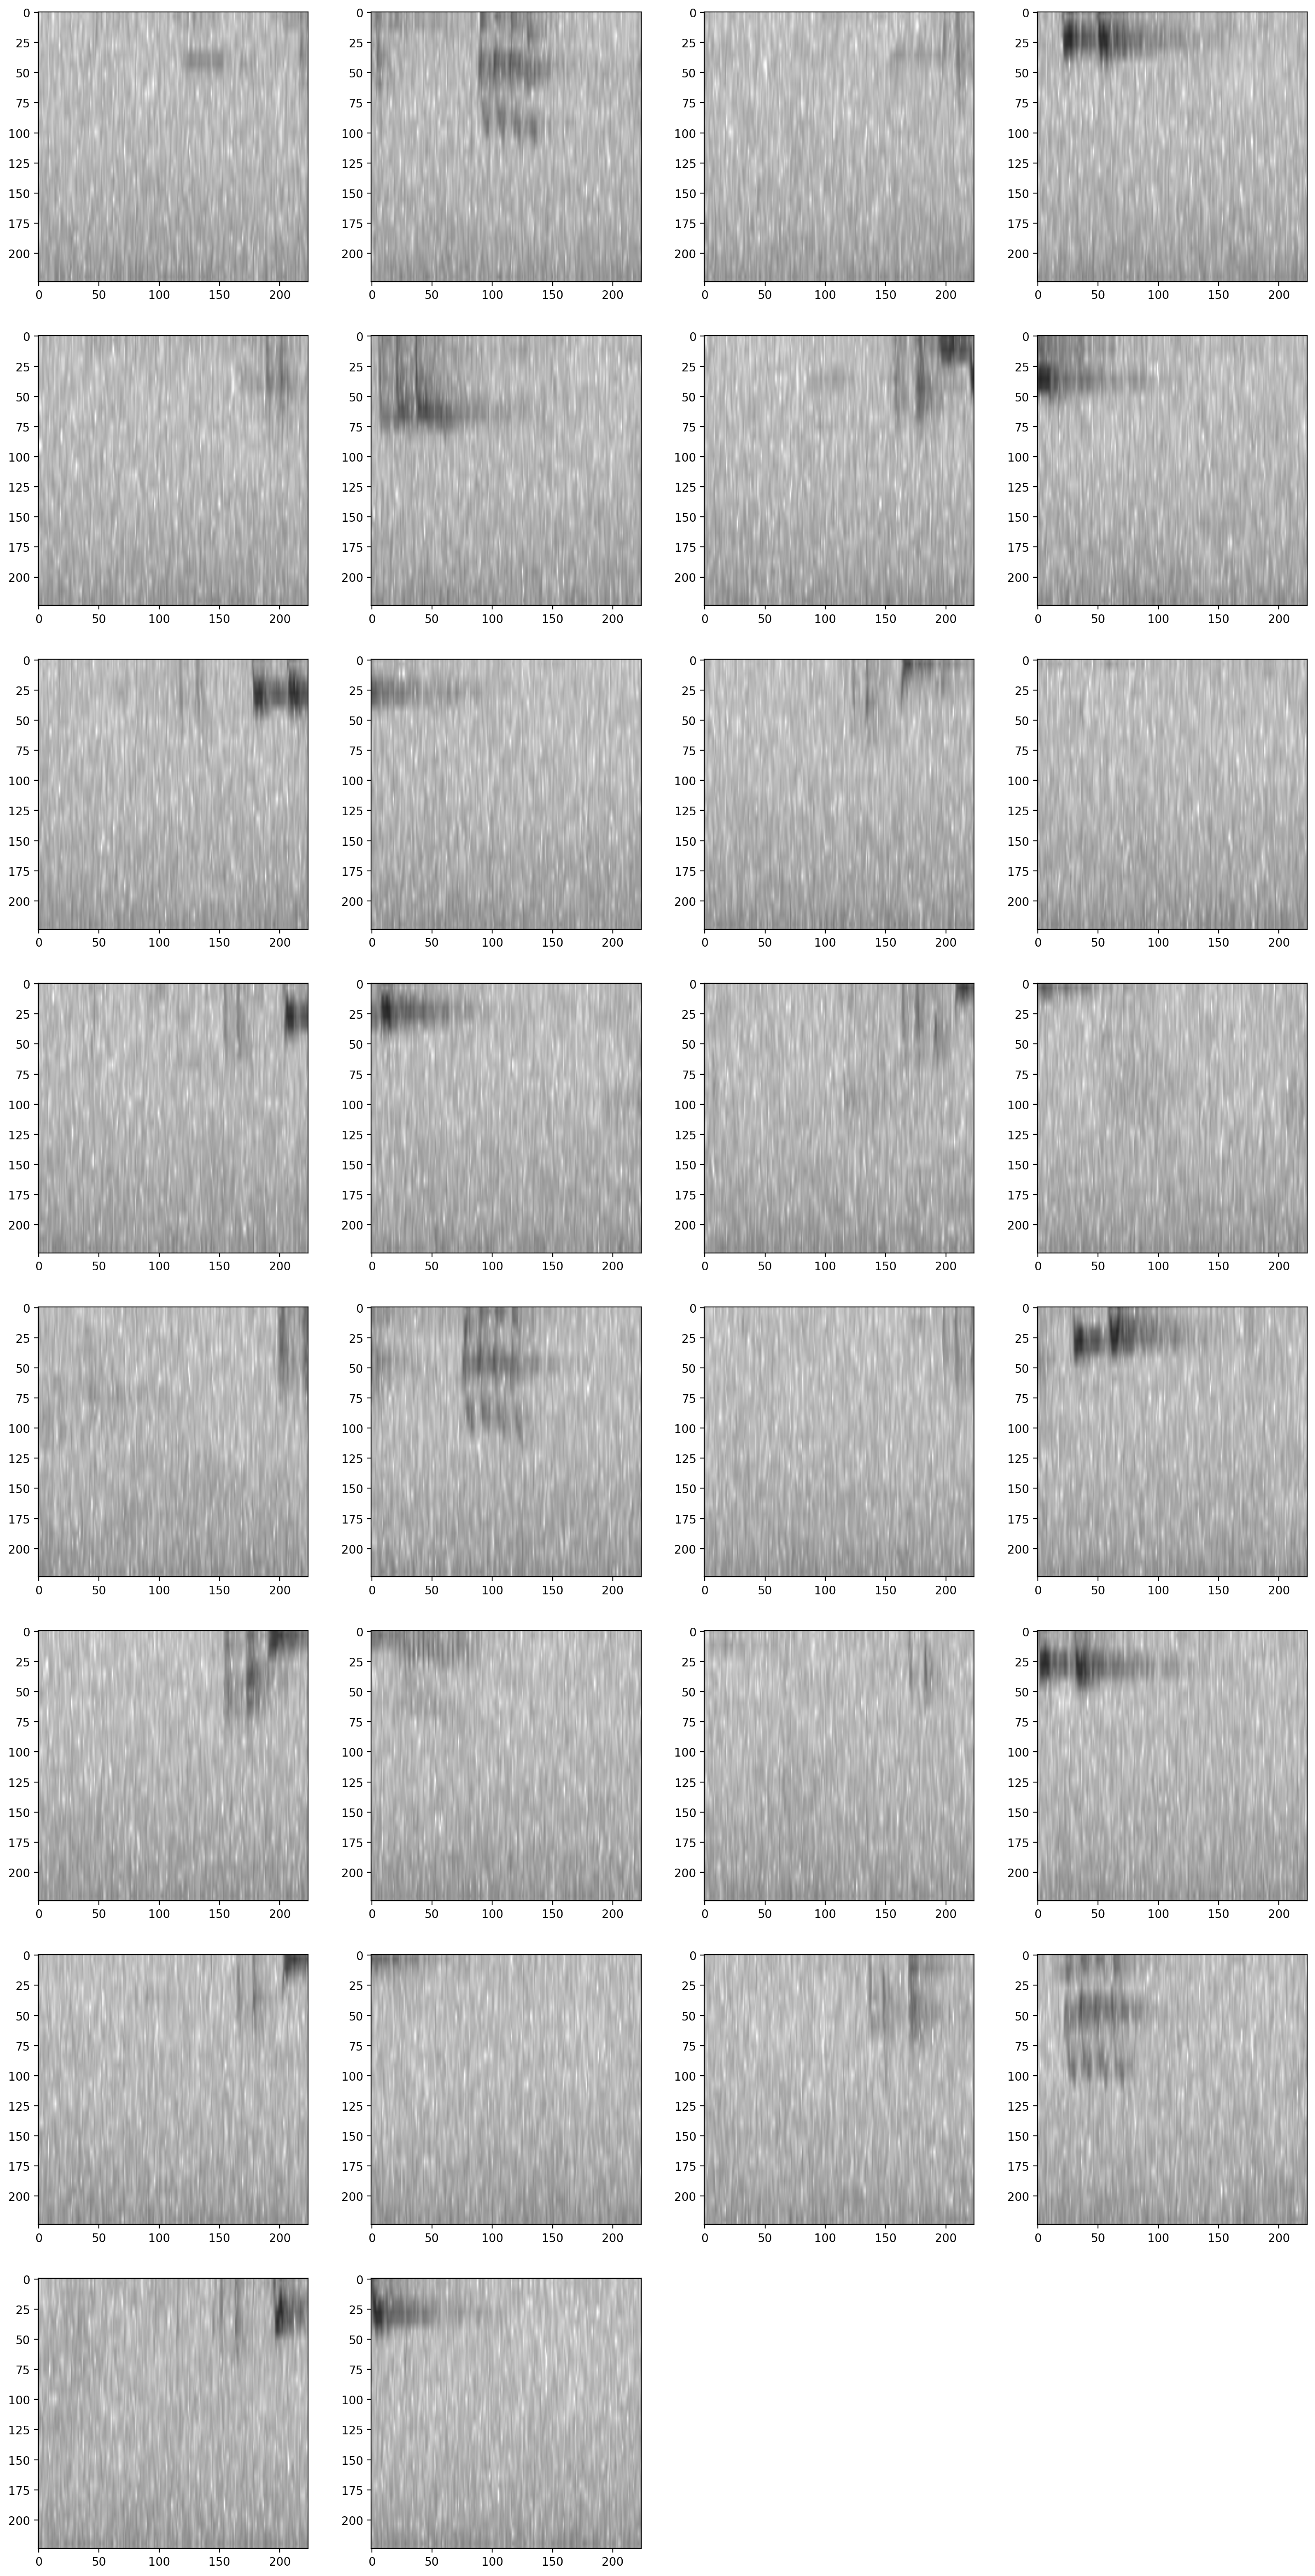

In [13]:
from opensoundscape.preprocess.utils import show_tensor_grid
from opensoundscape.ml.datasets import AudioSplittingDataset

#generate a dataset with the samples we wish to generate and the model's preprocessor
inspection_dataset = AudioSplittingDataset(audio_files, model.preprocessor) 
inspection_dataset.bypass_augmentations = True

samples = [sample.data for sample in inspection_dataset]
_ = show_tensor_grid(samples,4,invert=True)

## Options for prediction

The code above returns the raw predictions of the model without any post-processing (such as a softmax layer or a sigmoid layer). 

For details on how to post-processing prediction scores and to generate binary 0/1 predictions of class presence, see the "Basic training and prediction with CNNs" tutorial notebook. But, as a quick example here, let's add a softmax layer to make the prediction scores for both classes sum to 1. 

We can also convert our continuous scores into True/False (or 1/0) predictions for the presence of each class in each sample. Think about whether each clip should be labeled with only one class (use `metrics.predict_single_target_labels`) or whether each clip could contain zero, one, or multiple classes (use `metrics.predict_multi_target_labels`)

In [14]:
scores = model.predict(
    audio_files,
    activation_layer='softmax',
)

  0%|          | 0/30 [00:00<?, ?it/s]

As before, the `scores` are continuous variables, but now have been softmaxed:

In [15]:
scores.head()

rana_sierrae  negative
file       start_time end_time                        
./1min.wav 0.0        2.0           0.881132  0.118868
           2.0        4.0           0.329790  0.670210
           4.0        6.0           0.076634  0.923366
           6.0        8.0           0.125161  0.874839
           8.0        10.0          0.014111  0.985889

Now let's use the `predict_single_target_labels(scores)` function to label the highest scoring class 1 for each sample, and other classes 0. 

In [16]:
from opensoundscape.metrics import predict_single_target_labels
predicted_labels = predict_single_target_labels(scores)
predicted_labels.head()

rana_sierrae  negative
file       start_time end_time                        
./1min.wav 0.0        2.0                  1         0
           2.0        4.0                  0         1
           4.0        6.0                  0         1
           6.0        8.0                  0         1
           8.0        10.0                 0         1

It is sometimes helpful to look at a histogram of the scores:

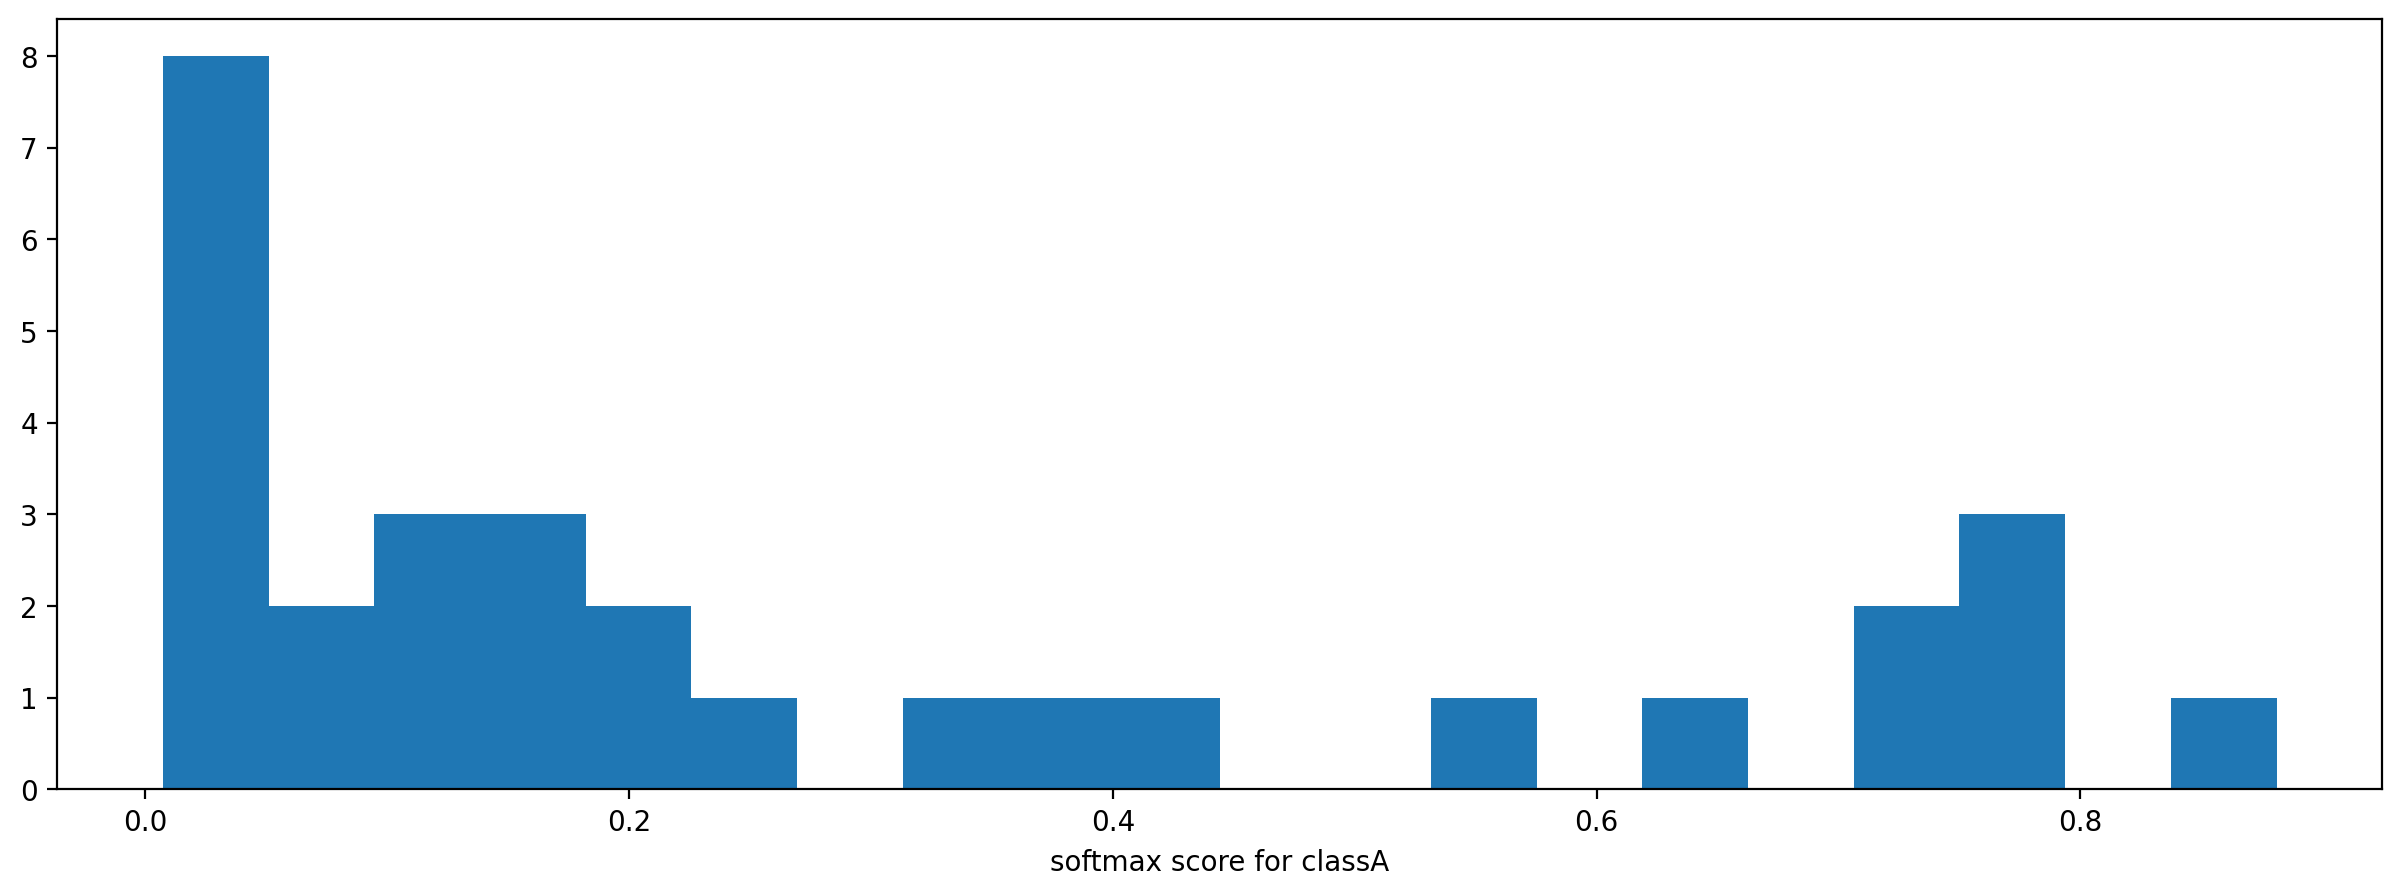

In [17]:
_ = plt.hist(scores['rana_sierrae'],bins=20)
_ = plt.xlabel('softmax score for classA')

## Using models trained in older OpenSoundscape versions

In general, if you want to use a model created in an older version of OpenSoundscape in a newer version, you should:


1. use or re-create a separate Python environment (eg, conda environment) that has the same version of OpenSoundscape used to create and train the model. 


2. Save the model's weights like this: 
```
torch.save({'weights':model.network.state_dict(),'my_weights.pt'
```


3. You'll also want to save the architecture, list and order of model classes, and sample input shape, and take note of preprocessing parameters.


4. Then, in your new opensoundscape environment, recreate the model with the same architecture, input shape, class list, and preprocessing parameters

5. Load the saved weights into the model architecture:

```
weights = torch.load('my_weights.pt')['weights']
my_cnn.network.load_state_dict(weights)
```


If you need assistance loading a model developed in a different OpenSoundscape version, contact one of the developers of OpenSoundscape. 

### Clean up: delete model objects

In [18]:
from pathlib import Path
for p in Path('.').glob('*.model'):
    p.unlink()
Path('1min.wav').unlink()